# Sensitivity analysis

## 1. Varying infection probability p

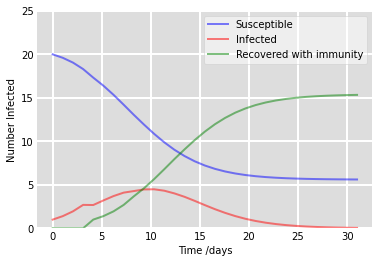

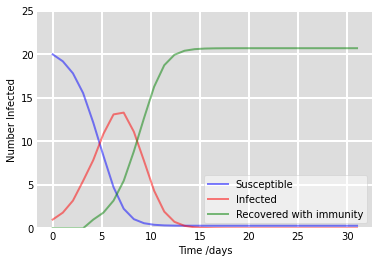

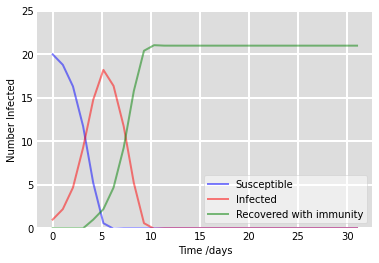

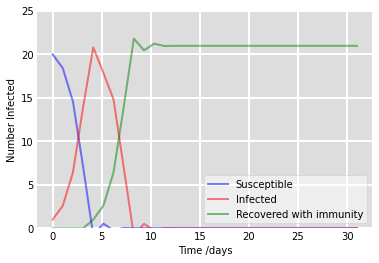

for p = [0.02, 0.04, 0.06, 0.08]
The pandemic stops on day [28, 15, 10, 8]
The maximal number of people who stay infected on any given day is [4.485592293561057, 13.300712893922269, 18.212892629509884, 20.804371318286982]
This infection peak will occur on day [10, 7, 5, 4]
The infection peak will last for [1, 1, 1, 1]


In [ ]:
from numpy import zeros, linspace
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

p = 0.02 # Probability of infection
ls_p = []
d_i = []
max_inf = []
max_inf_d = []
max_inf_len = []

for p in np.arange(0.02, 0.1, 0.02):
    ls_p.append(p)
    n = 20 # Number of students in the class
    contact_ratio = 1 # Average ratio of the class that an infected person will contact 
    inf_t = 3 # Infection period in days

    Avg_num_contact = n * contact_ratio
    beta = p * Avg_num_contact 
    dt = 1          # Time unit in days  
    D = 30          # Simulate for D days

    t = np.linspace(0, D+1,D+1)

    S = zeros(D+1)
    I = zeros(D+1)
    R = zeros(D+1)

    # Initial condition
    S[0] = n
    I[0] = 1
    R[inf_t+1] = 1

    # Step equations forward in time
    for n in range(D):
        S[n+1] = S[n] - dt*beta*S[n]*I[n] / S[0]
        if n < inf_t:
            I[n+1] = I[n] + dt*beta*S[n]*I[n] / S[0]
        elif n == inf_t:
            I[n+1] = I[n] + dt*beta*S[n]*I[n] / S[0] - I[0]
        else:
            I[n+1] = I[n] + dt*beta*S[n]*I[n] / S[0] - dt*beta*S[n-inf_t-1]*I[n-inf_t-1] / S[0]
            R[n+1] = R[n] + dt*beta*S[n-inf_t-1]*I[n-inf_t-1] / S[0]

    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number Infected')
    ax.set_ylim(0,25)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

    n_min = 0.1
    for i in range(len(I)):
        if I[i] < n_min:
            #print("The pandemic stops on day", i)
            break

    # print("The maximal number of people who stacy infected on any given day is", max(I))
    # print("This infection peak will occur on day", list(I).index(max(I)))
    # print("The infection peak will last for", list(I).count(max(I)), "days")
    d_i.append(i)
    max_inf.append(max(I))
    max_inf_d.append(list(I).index(max(I)))
    max_inf_len.append(list(I).count(max(I)))

print("for p =", ls_p)
print("The pandemic stops on day", d_i)
print("The maximal number of people who stay infected on any given day is", max_inf)
print("This infection peak will occur on day", max_inf_d)
print("The infection peak will last for", max_inf_len)

## 2. Varying infection period in days with infection probability p = 0.02

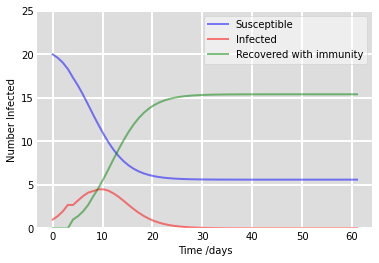

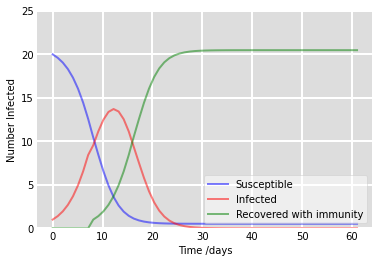

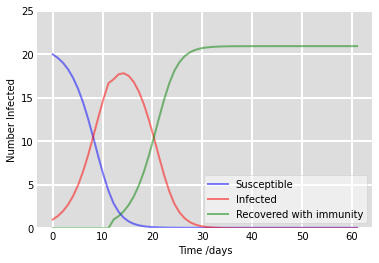

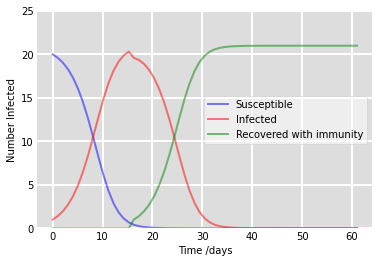

for inf_t = [3, 7, 11, 15]
The pandemic stops on day [28, 29, 32, 35]
The maximal number of people who stay infected on any given day is [4.485592293561057, 13.71311160169674, 17.829941230780797, 20.31864679833771]
This infection peak will occur on day [10, 12, 14, 15]
The infection peak will last for [1, 1, 1, 1]


In [ ]:
from numpy import zeros, linspace
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

inf_t = 3 # Infection period in days
ls_t = []
d_i = []
max_inf = []
max_inf_d = []
max_inf_len = []

for inf_t in np.arange(3, 16, 4):
    ls_t.append(inf_t)
    p = 0.02 # Probability of infection
    n = 20 # Number of students in the class
    contact_ratio = 1 # Average ratio of the class that an infected person will contact 
    

    Avg_num_contact = n * contact_ratio
    beta = p * Avg_num_contact 
    dt = 1          # Time unit in days  
    D = 60          # Simulate for D days

    t = np.linspace(0, D+1,D+1)

    S = zeros(D+1)
    I = zeros(D+1)
    R = zeros(D+1)

    # Initial condition
    S[0] = n
    I[0] = 1
    R[inf_t+1] = 1

    # Step equations forward in time
    for n in range(D):
        S[n+1] = S[n] - dt*beta*S[n]*I[n] / S[0]
        if n < inf_t:
            I[n+1] = I[n] + dt*beta*S[n]*I[n] / S[0]
        elif n == inf_t:
            I[n+1] = I[n] + dt*beta*S[n]*I[n] / S[0] - I[0]
        else:
            I[n+1] = I[n] + dt*beta*S[n]*I[n] / S[0] - dt*beta*S[n-inf_t-1]*I[n-inf_t-1] / S[0]
            R[n+1] = R[n] + dt*beta*S[n-inf_t-1]*I[n-inf_t-1] / S[0]

    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number Infected')
    ax.set_ylim(0,25)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

    n_min = 0.1
    for i in range(len(I)):
        if I[i] < n_min:
            #print("The pandemic stops on day", i)
            break

    # print("The maximal number of people who stacy infected on any given day is", max(I))
    # print("This infection peak will occur on day", list(I).index(max(I)))
    # print("The infection peak will last for", list(I).count(max(I)), "days")
    d_i.append(i)
    max_inf.append(max(I))
    max_inf_d.append(list(I).index(max(I)))
    max_inf_len.append(list(I).count(max(I)))

print("for inf_t =", ls_t)
print("The pandemic stops on day", d_i)
print("The maximal number of people who stay infected on any given day is", max_inf)
print("This infection peak will occur on day", max_inf_d)
print("The infection peak will last for", max_inf_len)

## 3. Varying infection period with infection probability p = 0.2

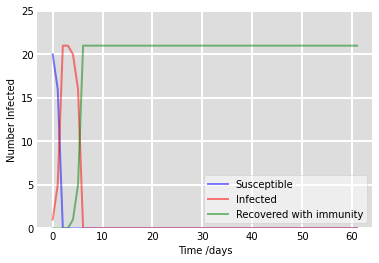

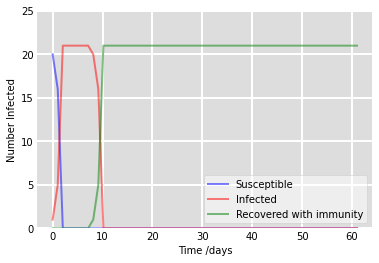

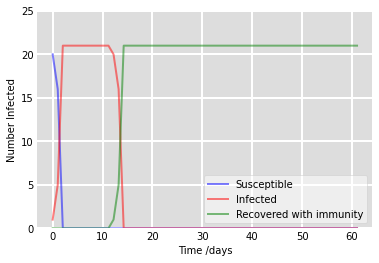

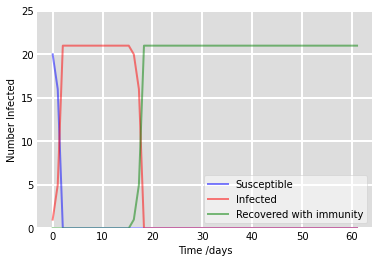

for inf_t = [3, 7, 11, 15]
The pandemic stops on day [6, 10, 14, 18]
The maximal number of people who stay infected on any given day is [21.0, 21.0, 21.0, 21.0]
This infection peak will occur on day [2, 2, 2, 2]
The infection peak will last for [2, 6, 10, 14]


In [ ]:
from numpy import zeros, linspace
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

inf_t = 3 # Infection period in days
ls_t = []
d_i = []
max_inf = []
max_inf_d = []
max_inf_len = []

for inf_t in np.arange(3, 16, 4):
    ls_t.append(inf_t)
    p = 0.2 # Probability of infection
    n = 20 # Number of students in the class
    contact_ratio = 1 # Average ratio of the class that an infected person will contact 
    

    Avg_num_contact = n * contact_ratio
    beta = p * Avg_num_contact 
    dt = 1          # Time unit in days  
    D = 60          # Simulate for D days

    t = np.linspace(0, D+1,D+1)

    S = zeros(D+1)
    I = zeros(D+1)
    R = zeros(D+1)

    # Initial condition
    S[0] = n
    I[0] = 1
    R[inf_t+1] = 1

    # Step equations forward in time
    for n in range(D):
        S[n+1] = S[n] - dt*beta*S[n]*I[n] / S[0]
        if n < inf_t:
            I[n+1] = I[n] + dt*beta*S[n]*I[n] / S[0]
        elif n == inf_t:
            I[n+1] = I[n] + dt*beta*S[n]*I[n] / S[0] - I[0]
        else:
            I[n+1] = I[n] + dt*beta*S[n]*I[n] / S[0] - dt*beta*S[n-inf_t-1]*I[n-inf_t-1] / S[0]
            R[n+1] = R[n] + dt*beta*S[n-inf_t-1]*I[n-inf_t-1] / S[0]

    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number Infected')
    ax.set_ylim(0,25)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

    n_min = 0.1
    for i in range(len(I)):
        if I[i] < n_min:
            #print("The pandemic stops on day", i)
            break

    # print("The maximal number of people who stacy infected on any given day is", max(I))
    # print("This infection peak will occur on day", list(I).index(max(I)))
    # print("The infection peak will last for", list(I).count(max(I)), "days")
    d_i.append(i)
    max_inf.append(max(I))
    max_inf_d.append(list(I).index(max(I)))
    max_inf_len.append(list(I).count(max(I)))

print("for inf_t =", ls_t)
print("The pandemic stops on day", d_i)
print("The maximal number of people who stay infected on any given day is", max_inf)
print("This infection peak will occur on day", max_inf_d)
print("The infection peak will last for", max_inf_len)

## 4. Varying class size

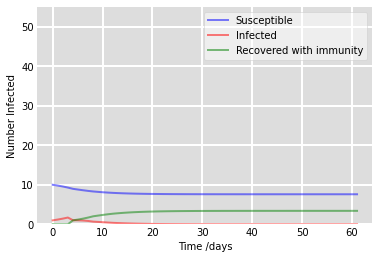

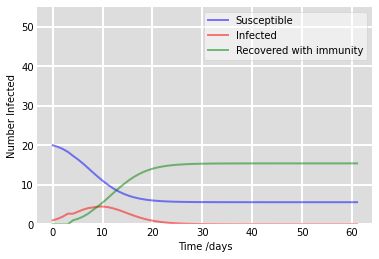

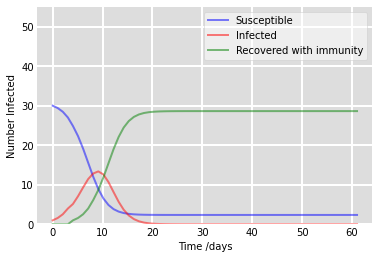

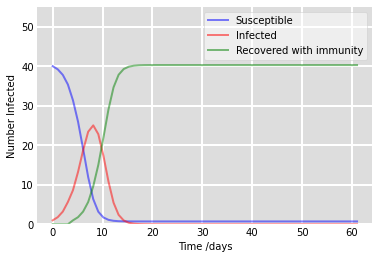

for n = [10, 20, 30, 40]
The pandemic stops on day [20, 28, 21, 17]
The maximal number of people who stay infected on any given day is [1.7097480192, 4.485592293561057, 13.383268780067594, 25.02061914837522]
This infection peak will occur on day [3, 10, 9, 8]
The infection peak will last for [1, 1, 1, 1]


In [ ]:
from numpy import zeros, linspace
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

n = 20 # Number of students in the class 
ls_n = []
d_i = []
max_inf = []
max_inf_d = []
max_inf_len = []

for n in np.arange(10, 41, 10):
    ls_n.append(n)
    p = 0.02 # Probability of infection
    contact_ratio = 1 # Average ratio of the class that an infected person will contact
    inf_t = 3 # Infection period in days
    

    Avg_num_contact = n * contact_ratio
    beta = p * Avg_num_contact 
    dt = 1          # Time unit in days  
    D = 60          # Simulate for D days

    t = np.linspace(0, D+1,D+1)

    S = zeros(D+1)
    I = zeros(D+1)
    R = zeros(D+1)

    # Initial condition
    S[0] = n
    I[0] = 1
    R[inf_t+1] = 1

    # Step equations forward in time
    for n in range(D):
        S[n+1] = S[n] - dt*beta*S[n]*I[n] / S[0]
        if n < inf_t:
            I[n+1] = I[n] + dt*beta*S[n]*I[n] / S[0]
        elif n == inf_t:
            I[n+1] = I[n] + dt*beta*S[n]*I[n] / S[0] - I[0]
        else:
            I[n+1] = I[n] + dt*beta*S[n]*I[n] / S[0] - dt*beta*S[n-inf_t-1]*I[n-inf_t-1] / S[0]
            R[n+1] = R[n] + dt*beta*S[n-inf_t-1]*I[n-inf_t-1] / S[0]

    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number Infected')
    ax.set_ylim(0,55)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

    n_min = 0.1
    for i in range(len(I)):
        if I[i] < n_min:
            #print("The pandemic stops on day", i)
            break

    # print("The maximal number of people who stacy infected on any given day is", max(I))
    # print("This infection peak will occur on day", list(I).index(max(I)))
    # print("The infection peak will last for", list(I).count(max(I)), "days")
    d_i.append(i)
    max_inf.append(max(I))
    max_inf_d.append(list(I).index(max(I)))
    max_inf_len.append(list(I).count(max(I)))

print("for n =", ls_n)
print("The pandemic stops on day", d_i)
print("The maximal number of people who stay infected on any given day is", max_inf)
print("This infection peak will occur on day", max_inf_d)
print("The infection peak will last for", max_inf_len)

## 5. Varying contact ratio

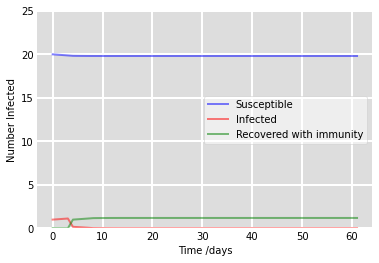

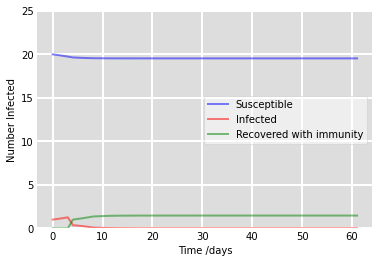

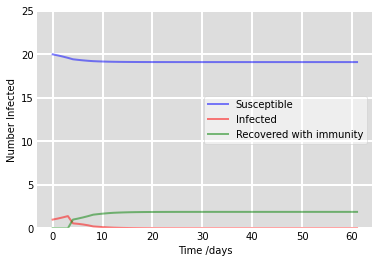

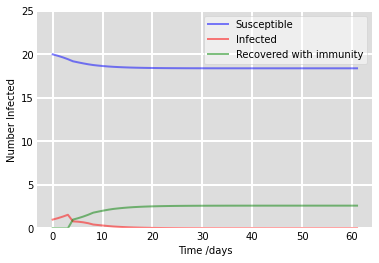

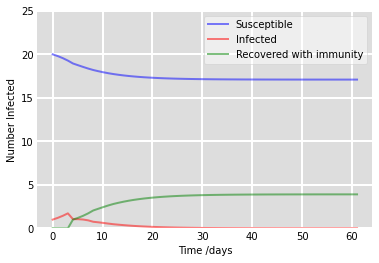

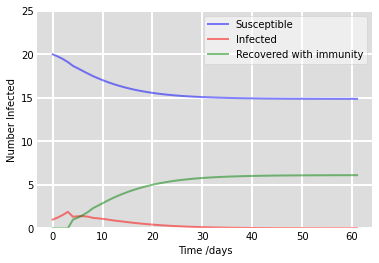

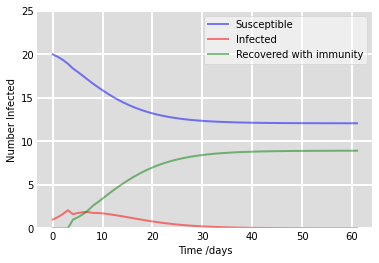

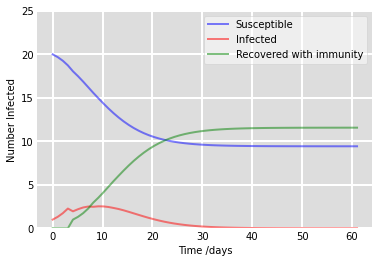

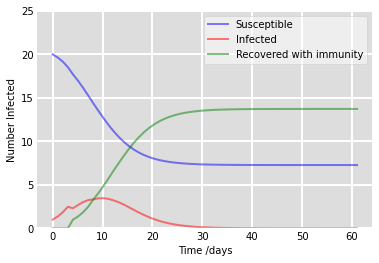

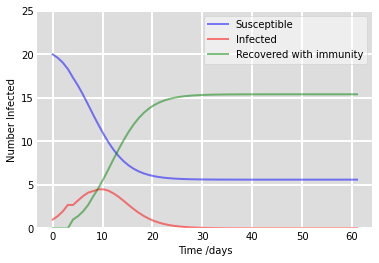

for contact ratio = [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0]
The pandemic stops on day [6, 8, 12, 16, 24, 32, 36, 34, 31, 28]
The maximal number of people who stay infected on any given day is [1.1246011484226355, 1.2585642381449627, 1.4021174121162343, 1.5554733882330316, 1.7188290624, 1.8923651252892468, 2.076245692695183, 2.5262371932594574, 3.465769002736326, 4.485592293561057]
This infection peak will occur on day [3, 3, 3, 3, 3, 3, 3, 9, 10, 10]
The infection peak will last for [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
from numpy import zeros, linspace
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

contact_ratio = 1 # Average ratio of the class that an infected person will contact
ls_r = []
d_i = []
max_inf = []
max_inf_d = []
max_inf_len = []

for contact_ratio in np.arange(0.1, 1.1, 0.1):
    ls_r.append(contact_ratio)
    n = 20 # Number of students in the class 
    p = 0.02 # Probability of infection
    inf_t = 3 # Infection period in days
    

    Avg_num_contact = n * contact_ratio
    beta = p * Avg_num_contact 
    dt = 1          # Time unit in days  
    D = 60          # Simulate for D days

    t = np.linspace(0, D+1,D+1)

    S = zeros(D+1)
    I = zeros(D+1)
    R = zeros(D+1)

    # Initial condition
    S[0] = n
    I[0] = 1
    R[inf_t+1] = 1

    # Step equations forward in time
    for n in range(D):
        S[n+1] = S[n] - dt*beta*S[n]*I[n] / S[0]
        if n < inf_t:
            I[n+1] = I[n] + dt*beta*S[n]*I[n] / S[0]
        elif n == inf_t:
            I[n+1] = I[n] + dt*beta*S[n]*I[n] / S[0] - I[0]
        else:
            I[n+1] = I[n] + dt*beta*S[n]*I[n] / S[0] - dt*beta*S[n-inf_t-1]*I[n-inf_t-1] / S[0]
            R[n+1] = R[n] + dt*beta*S[n-inf_t-1]*I[n-inf_t-1] / S[0]

    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number Infected')
    ax.set_ylim(0,25)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

    n_min = 0.1
    for i in range(len(I)):
        if I[i] < n_min:
            #print("The pandemic stops on day", i)
            break

    # print("The maximal number of people who stacy infected on any given day is", max(I))
    # print("This infection peak will occur on day", list(I).index(max(I)))
    # print("The infection peak will last for", list(I).count(max(I)), "days")
    d_i.append(i)
    max_inf.append(max(I))
    max_inf_d.append(list(I).index(max(I)))
    max_inf_len.append(list(I).count(max(I)))

print("for contact ratio =", ls_r)
print("The pandemic stops on day", d_i)
print("The maximal number of people who stay infected on any given day is", max_inf)
print("This infection peak will occur on day", max_inf_d)
print("The infection peak will last for", max_inf_len)